<a href="https://colab.research.google.com/github/hmyrcmn/MachinaLearning/blob/main/ucb_upperConfidenceBound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RANDOM SELECTİON

In [ ]:
# her olayın arkasında bir dağılım var

# kullanıcı eylemlerini analiz etmek : hangi reklamın dah açok tıklaanacağının pekişmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

veriler = pd.read_csv('Ads_CTR_Optimisation.csv')

veriler


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [ ]:
#veride null degerler varmı nasıl kodntrol edili
cauntNull=veriler.isnull().sum()
print(cauntNull)

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64


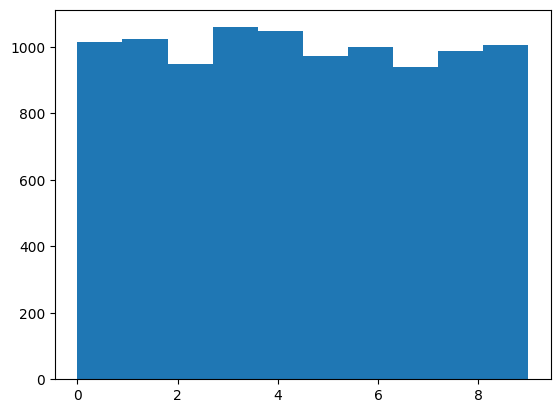

In [ ]:
import random

N = 10000
d = 10
toplam = 0
secilenler = []
for n in range(0,N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = veriler.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    toplam = toplam + odul


plt.hist(secilenler)
plt.show()

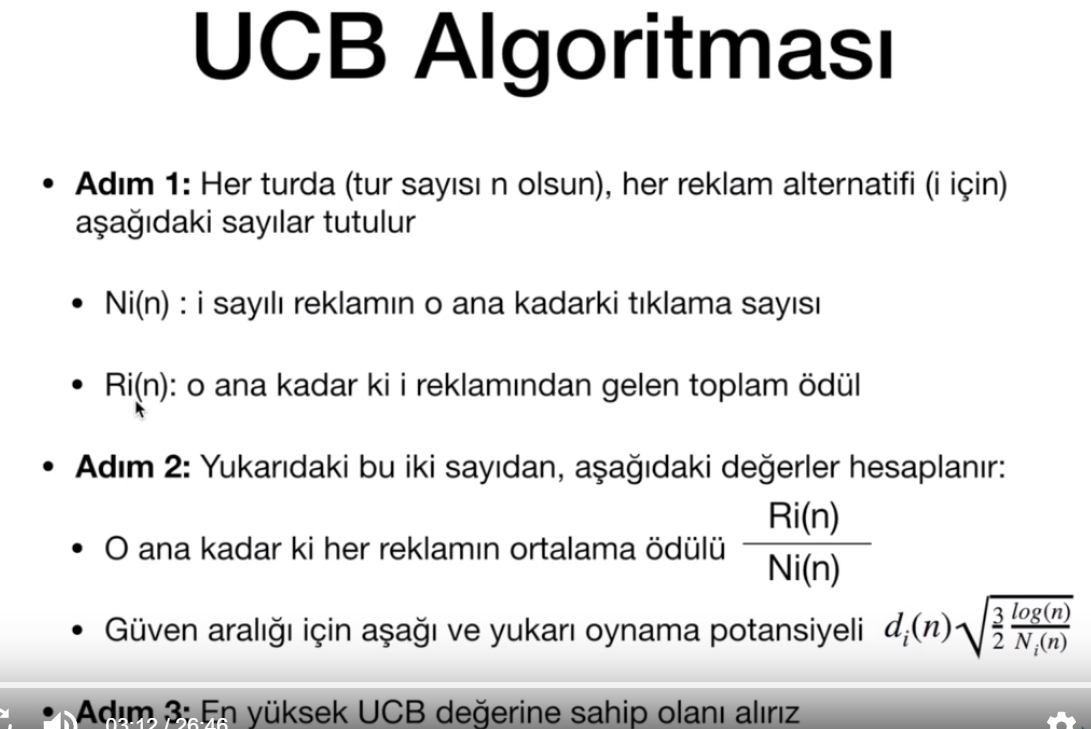

UCB

Toplam Odul:
2231


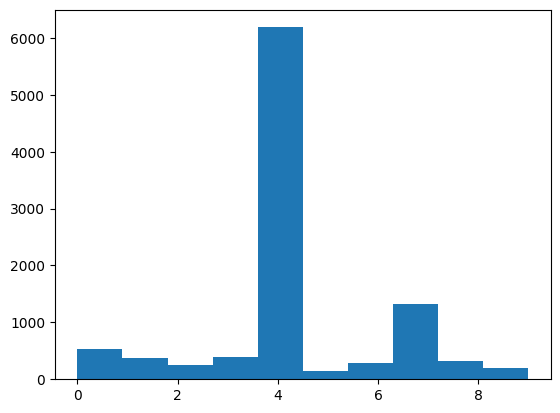

In [ ]:
import math
#UCB
N = 10000 # 10.000 tıklama
d = 10  # toplam 10 ilan var
#Ri(n)
oduller = [0] * d #ilk basta butun ilanların odulu 0
#Ni(n)
tiklamalar = [0] * d #o ana kadarki tıklamalar
toplam = 0 # toplam odul
secilenler = []
for n in range(1,N):
    ad = 0 #seçilen ilan
    max_ucb = 0
    for i in range(0,d):
        if(tiklamalar[i] > 0):
            ortalama = oduller[i] / tiklamalar[i]
            delta = math.sqrt(3/2* math.log(n)/tiklamalar[i])
            ucb = ortalama + delta
        else:
            ucb = N*10
        if max_ucb < ucb: #max'tan büyük bir ucb çıktı
            max_ucb = ucb
            ad = i
    secilenler.append(ad)
    tiklamalar[ad] = tiklamalar[ad]+ 1
    odul = veriler.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    oduller[ad] = oduller[ad]+ odul
    toplam = toplam + odul
print('Toplam Odul:')
print(toplam)

plt.hist(secilenler)
plt.show()

